In [1]:
from oxDNA_analysis_tools.UTILS.oxview import from_path
import oxpy
from oxdna_json_utils import input_json
from simulation_interfaces import *
from forces import Force
from production_files import write_production, get_windows_per_gpu, run_production_slurm_files
from analysis import wham_analysis
from sim_macros import *
from copy import deepcopy

### oxView Interactive Conf Visulization

In [12]:
path = '//scratch/matthew/melting_sims/umbrella/sim_macros/1p_systems'
systems = ['1p_k1_max8', '1p_k5_max8', '1p_k20_max8', '1p_k5_max6']

In [2]:
dat = f"//scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment/a4b8.dat"
top = f"//scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment/a4b8.top"
from_path(dat, top, Inbox=['None', 'Origin'])

### Prepare 4 Systems for Umbrella Sampling Production

In [3]:
path = '//scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment'
systems = ["k5_46_70", "k20_46_70", "k40_46_70"]

In [4]:
input_json_dict = input_json()
input_json_dict['steps'] = '2e5'
input_json_dict["CUDA_list"] = "no"
input_json_dict["use_average_seq"] = "false"
input_json_dict["seq_dep_file"] = 'oxDNA2_sequence_dependent_parameters.txt'
input_json_dict['print_conf_interval'] = '100000'
input_json_dict['print_energy_every'] = '100000'
prepare_umbrella_input = deepcopy(input_json_dict)

walker_com_forces = {}
k_values = ['5', '20', '40']
for walker, k in enumerate(k_values):
    walker_com_forces[str(walker)] = []
    walker_com_forces[str(walker)].append(Force.com_force(
        p1=get_op_string(46, 47),
        p2=get_op_string(70, 71),
        k=k,
        r0='0',
        pbc='0',
        rate='0'
    ))

walker_steps_per_conf = [1e5, 1e5, 1e5]
xmin = [0.2, 0.2, 0.2]
xmax = [7, 7, 7]
n_windows = [200, 200, 200]
processes = multi_prepare_melting_umbrella(path, systems, prepare_umbrella_input, walker_com_forces, walker_steps_per_conf, xmin, xmax, n_windows, n_walkers=3)


Running //scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment/k20_46_70/k20_46_70_eq
Running //scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment/k40_46_70/k40_46_70_eq
Running //scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment/k5_46_70/k5_46_70_eq



Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the o

### Run Time Visulization of Simulation Energies

k5_46_70
k20_46_70
k40_46_70


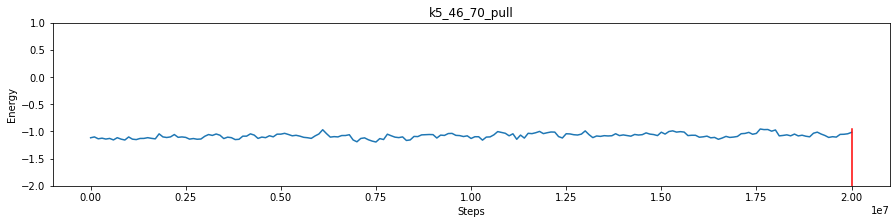

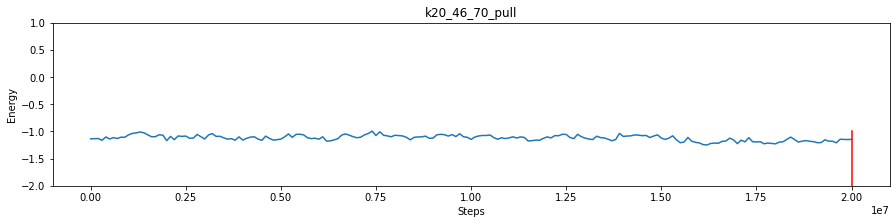

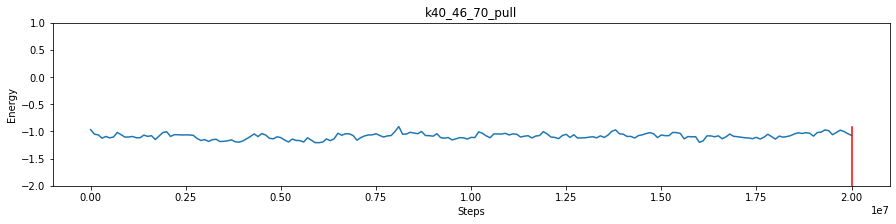

In [4]:
input_json_dict = input_json()
input_json_dict['steps'] = '2e7'
prepare_umbrella_input = deepcopy(input_json_dict)
for i in systems:
    print(i)
    sim_path = f"{path}/{i}/{i}_pull"
    plot_energy(sim_path, prepare_umbrella_input)

### Create Umbrella Simulations for Production

In [34]:
path = '//scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment'
systems = ["k5_46_70", "k20_46_70", "k40_46_70"]

In [5]:
input_json_dict = input_json()
input_json_dict['steps'] = '1e6'
input_json_dict["CUDA_list"] = "no"
input_json_dict["use_average_seq"] = "false"
input_json_dict["seq_dep_file"] = 'oxDNA2_sequence_dependent_parameters.txt'
input_json_dict['print_conf_interval'] = '100000'
input_json_dict['print_energy_every'] = '100000'
json_production = deepcopy(input_json_dict)

walker_com_forces = {}
k_values = ['5', '20', '40']
for walker, k in enumerate(k_values):
    walker_com_forces[str(walker)] = []
    walker_com_forces[str(walker)].append(Force.com_force(
        p1=get_op_string(46, 47),
        p2=get_op_string(70, 71),
        k=k,
        r0='0',
        pbc='0',
        rate='0'
    ))

xmin = [0.2, 0.2, 0.2]
xmax = [7, 7, 7]
n_windows = [200, 200, 200]
n_gpus = [2, 2, 2]
p1=get_op_string(46, 47)
p2=get_op_string(70, 71)
run_file = f'{path}/{systems[0]}/run.sh'
processes = multi_production_setup(path, systems, p1, p2, json_production,  walker_com_forces, xmin, xmax, n_gpus, run_file, n_walkers=3)

Writing production files...



Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the o

200 umbrella windows created



Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)


Writing production files...



Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the o

200 umbrella windows created



Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the o

Writing production files...



Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the o

200 umbrella windows created



Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)

Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)


### Submit Slurm Files to Run Umbrella Sampling On Cluster

In [39]:
path = '//scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment'
systems = ["k5_46_70", "k20_46_70", "k40_46_70"]

In [6]:
for system in systems:
    sim_dir = f"{path}/{system}/umbrella_production_1e6"
    windows_per_gpu = get_windows_per_gpu(2, 200)
    run_dirs = [0]
    for gpu_set in windows_per_gpu:
        run_dirs.append(run_dirs[-1] + gpu_set)
    run_dirs.pop()
    for i in run_dirs:
        os.chdir(os.path.join(f"{sim_dir}", str(i)))
        os.system("sbatch run.sh")

Submitted batch job 5416
Submitted batch job 5417
Submitted batch job 5418
Submitted batch job 5419
Submitted batch job 5420
Submitted batch job 5421


In [6]:
n_gpus = 3
n_window = 100
for system in systems:
    sim_dir = f"{path}/{system}/umbrella_production_1e5"
    run_production_slurm_files(n_gpus, n_windows, sim_dir)

TypeError: unsupported operand type(s) for //: 'list' and 'int'

### Preform WHAM analysis of Umbrella Sampling Simulation

In [3]:
path = '//scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment'
systems = ["k5_46_70", "k20_46_70", "k40_46_70"]

In [4]:
wham_dir = "/home/matthew/software/wham/wham"
sim_dirs = [f"{path}/{system}/umbrella_production_1e6" for system in systems]
com_dir = [os.path.join(sim_dir, 'com_files') for sim_dir in sim_dirs]
xmin = ['0.2', '0.2', '0.2']
xmax = ['7', '7', '7']
k_values = ['5', '20', '40']
n_bins = ['400', '400', '400']
tol = ['1e-7', '1e-7', '1e-7']
n_boot = ['0', '0', '0']
temp = [str( (25 + 273.15) / 3000), str( (25 + 273.15) / 3000), str( (25 + 273.15) / 3000)]

multi_analysis(wham_dir, sim_dirs, com_dir, xmin, xmax, k_values, n_bins, tol, n_boot, temp, n_walkers=3)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



{'0': <Process name='Process-1' pid=2453808 parent=2453473 stopped exitcode=0>,
 '1': <Process name='Process-2' pid=2453837 parent=2453473 stopped exitcode=0>,
 '2': <Process name='Process-3' pid=2453903 parent=2453473 stopped exitcode=0>}

In [2]:
#Parameters for WHAM analysis
wham_dir = "/home/matthew/software/wham/wham"
sim_dir = f"{path}/k5_64_46/umbrella_production_1e5"
com_dir = os.path.join(sim_dir, 'com_files')
xmin = "0"
xmax = "7"
k = "5"
n_bins = '100'
tol = '1e-7'
n_boot = '0'
temp = str( (25 + 273.15) / 3000)

wham_analysis(wham_dir, sim_dir, com_dir, xmin, xmax, k, n_bins, tol, n_boot, temp)

NameError: name 'path' is not defined

In [2]:
path = '//scratch/matthew/melting_sims/umbrella/sim_macros/strand_displacment'
systems = ["k5_46_70", "k20_46_70", "k40_46_70"]

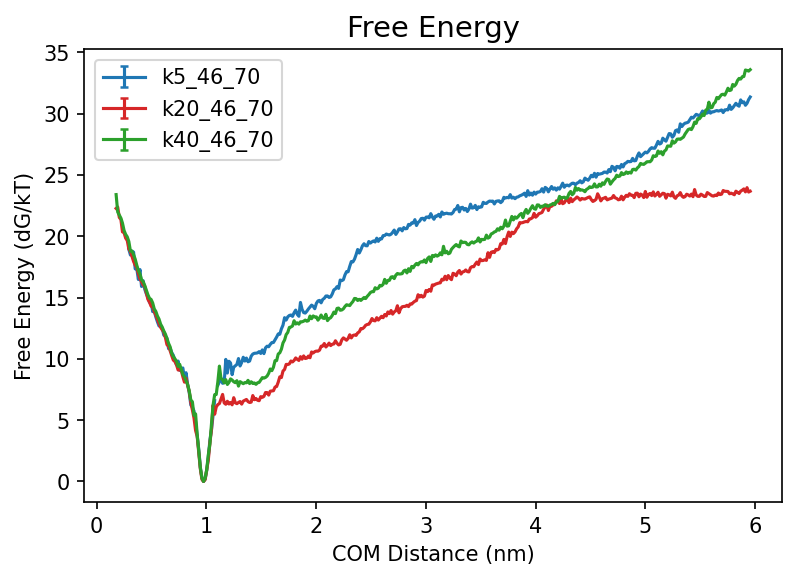

In [5]:
sim_dirs = [f"{path}/{system}/umbrella_production_1e6" for system in systems]
n_bins = ['400', '400', '400']
temps = [25, 25, 25]
c = ['tab:blue', 'tab:red', 'tab:green']
label = deepcopy(systems)
plot_free_energy(sim_dirs, n_bins, temps, seperate=False, c=c, label=label)

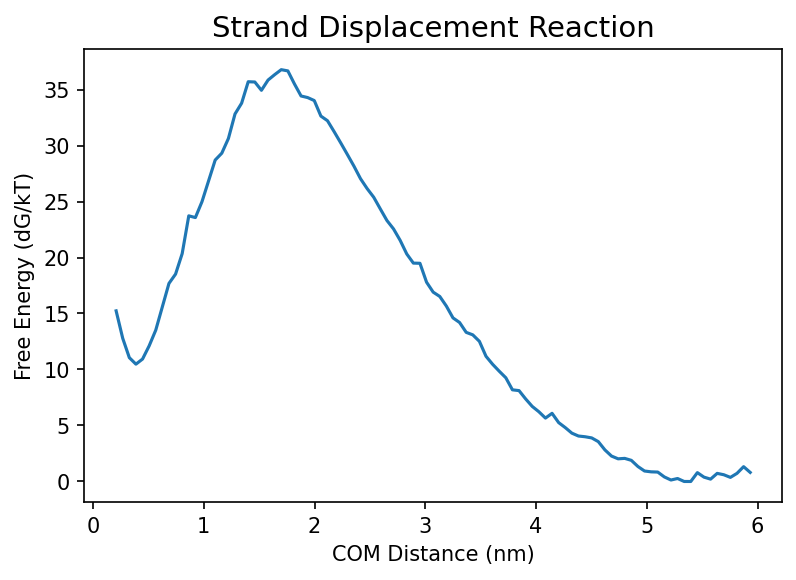

In [19]:
#Plot free energy
os.chdir(os.path.join(com_dir, 'time_series'))
freefile = pd.read_csv('freefile', sep='\t', nrows=int(n_bins))
plt_fig('Strand Displacement Reaction', 'COM Distance (nm)',
        'Free Energy (dG/kT)')
plt_err(freefile, 'tab:blue', 'k = 25', 25)

In [3]:
path = '//scratch/matthew/melting_sims/umbrella/sim_macros/1p_systems'
system =  '1p_k10_max7'
p1 = get_op_string(0, 8)
p2 = get_op_string(9, 17)
input_json_dict = input_json()
input_json_dict['steps'] = '1e5'
input_json_dict["CUDA_list"] = "no"
input_json_dict["use_average_seq"] = "false"
input_json_dict["seq_dep_file"] = 'oxDNA2_sequence_dependent_parameters.txt'
input_json_dict['print_conf_interval'] = '100000'
input_json_dict['print_energy_every'] = '100000'
input_umbrella = deepcopy(input_json_dict)

com_force_params = Force.com_force(
    p1=get_op_string(0, 8),
    p2=get_op_string(9, 17),
    k='10',
    r0='0',
    pbc='0',
    rate='0'
)
all_forces = [com_force_params]
steps_per_conf = 1e4
xmin = 0
xmax = 7
n_windows = 100
n_gpus = 5
run_file = f'{path}/{system}/run.sh'
#sim_dir = f"{path}/{system}/umbrella_production_1e5_example"
prepare_umbrella_sampling(path, system, p1, p2, input_umbrella, all_forces, steps_per_conf, xmin, xmax, n_windows, n_gpus, run_file)

Running //scratch/matthew/melting_sims/umbrella/sim_macros/1p_systems/1p_k10_max7/1p_k10_max7_eq
Running //scratch/matthew/melting_sims/umbrella/sim_macros/1p_systems/1p_k10_max7/1p_k10_max7_r0_eq
Running //scratch/matthew/melting_sims/umbrella/sim_macros/1p_systems/1p_k10_max7/1p_k10_max7_pull



Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)
INFO: seeding the RNG with -1657879413
INFO: Initializing backend 
INFO: Simulation type: MD
INFO: CUDA backend precision: mixed
INFO: The generator will try to take into account bonded interactions by choosing distances between bonded neighbours no larger than 2.000000
INFO: Using 'oxDNA2_sequence_dependent_parameters.txt' as the input for sequence-dependent values
INFO: Converting temperature from Celsius (25.000000 C°) to simulation units (0.099383)
INFO: Running Debye-Huckel at salt concentration =  1
INFO: Using differe

Writing production files...


FileNotFoundError: [Errno 2] No such file or directory: '//scratch/matthew/melting_sims/umbrella/sim_macros/1p_systems/1p_k10_max7/1p_k10_max7_pull/last_conf.dat'